Import bibliotek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Import danych

In [3]:
df = pd.read_csv('CO2.csv')

Wykres Stężenie CO2 na przestrzeni lat (1958-2017)

Text(0.5, 1.0, 'Zmiany stężenia CO2 na przestrzeni lat (1958-2017)')

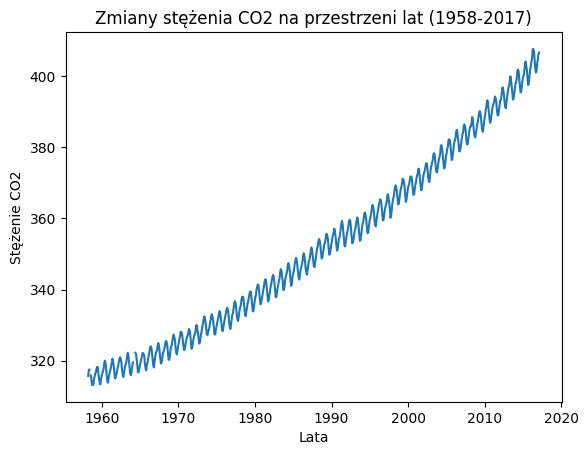

In [ ]:
fig, ax = plt.subplots()

lata = df["Decimal Date"]
co2 = df["Carbon Dioxide (ppm)"]

ax.plot(lata, co2)
ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2")
ax.set_title("Stężenie CO2 na przestrzeni lat (1958-2017)")

Ustawienie okna

In [6]:
rozmiar_okna = 12

Utworzenie lini trendu

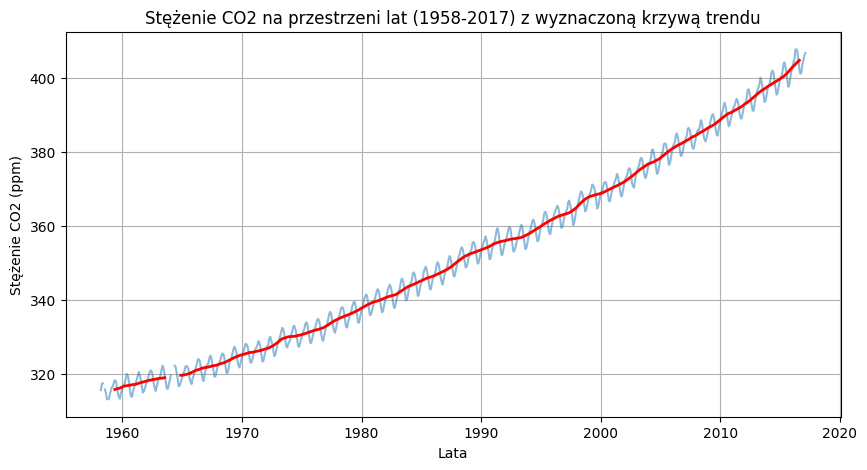

In [37]:
df_copy = df.sort_values("Decimal Date").copy()

df_copy["trend"] = (
    df_copy["Carbon Dioxide (ppm)"]
    .rolling(window=rozmiar_okna).mean()
    .rolling(window=2).mean()
    .shift(-rozmiar_okna // 2)
)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_copy["Decimal Date"], df_copy["Carbon Dioxide (ppm)"], label="CO2 (ppm)", alpha=0.5)
ax.plot(df_copy["Decimal Date"], df_copy["trend"], label="Trend (średnia krocząca)", color='red', linewidth=2)

ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2 (ppm)")
ax.set_title("Stężenie CO2 na przestrzeni lat (1958-2017) z wyznaczoną krzywą trendu")
ax.grid(True)

plt.show()

Detrending danych

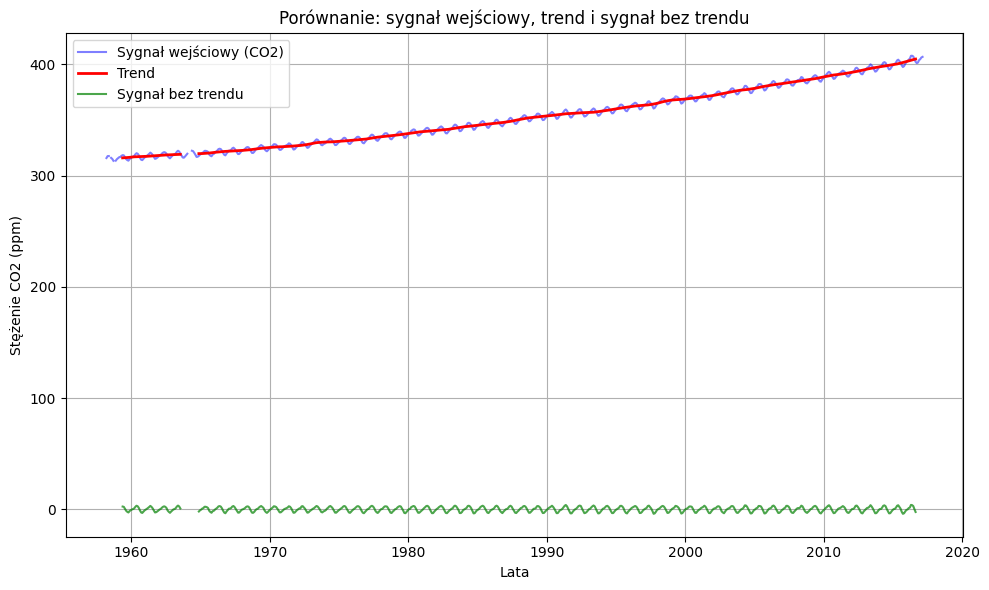

In [38]:
df_copy["detrended"] = df_copy["Carbon Dioxide (ppm)"] - df_copy["trend"]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_copy["Decimal Date"], df_copy["Carbon Dioxide (ppm)"], label="Sygnał wejściowy (CO2)", color='blue', alpha=0.5)
ax.plot(df_copy["Decimal Date"], df_copy["trend"], label="Trend", color='red', linewidth=2)
ax.plot(df_copy["Decimal Date"], df_copy["detrended"], label="Sygnał bez trendu", color='green', alpha=0.7)

ax.set_xlabel("Lata")
ax.set_ylabel("Stężenie CO2 (ppm)")
ax.set_title("Porównanie: sygnał wejściowy, trend i sygnał bez trendu")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

średnia szeregu czasowego po odfiltrowaniu trendu dla danej częstotliwości (miesiąc)

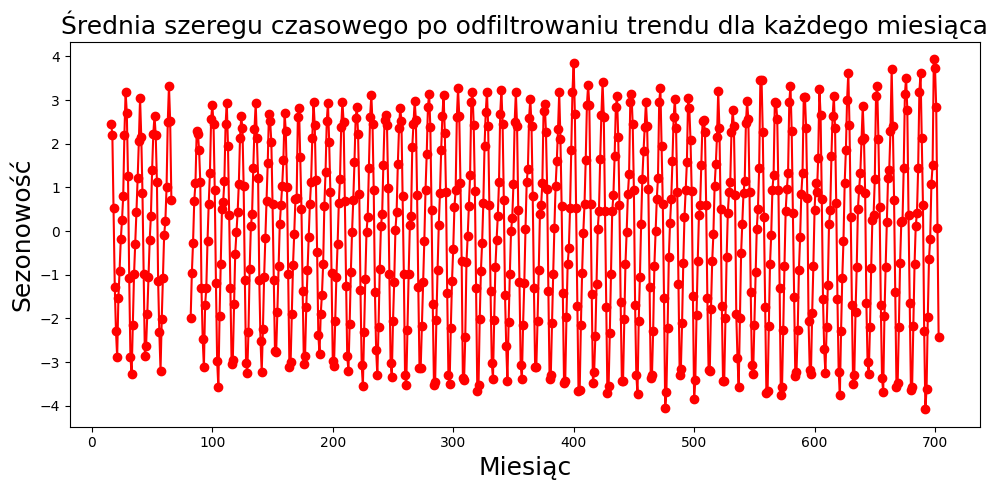

In [39]:
df_copy["Month"] = df_copy.index
sezonowosc = df_copy.groupby("Month").mean()["detrended"]
sezonowosc.name = "sezonowosc"
fig, ax = plt.subplots(figsize=[10, 5])
sezonowosc.plot(y="sezonowosc", ax=ax, marker="o", color="red")
ax.set_xlabel("Miesiąc", fontsize=18)
ax.set_ylabel("Sezonowość", fontsize=18)
ax.set_title("Średnia szeregu czasowego po odfiltrowaniu trendu dla każdego miesiąca", fontsize=18)
plt.tight_layout()
plt.show()

Wyliczenie rezyduów

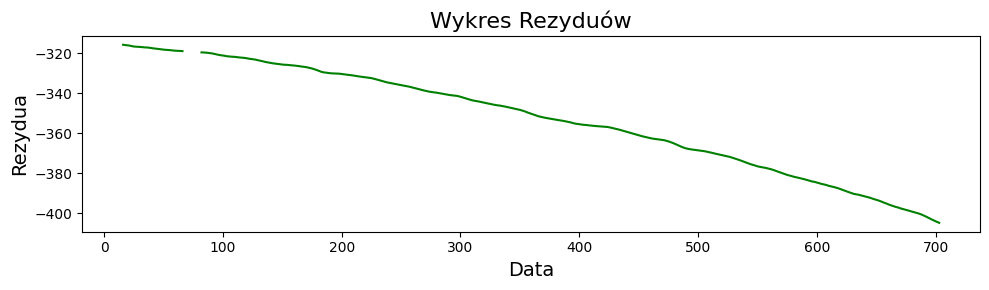

In [43]:
df_merge = df_copy.merge(right=sezonowosc, left_on="Month", right_index=True)
df_sorted = df_merge.sort_index()
df_sorted.head()
df_sorted["residual"] = df_sorted["detrended"] - df_sorted["trend"] - df_sorted["sezonowosc"]

fig, ax = plt.subplots(figsize=[10, 3])
df_sorted["residual"].plot(ax=ax, color="green")
ax.set_xlabel("Data", fontsize=14)
ax.set_ylabel("Rezydua", fontsize=14)
ax.set_title("Wykres Rezyduów", fontsize=16)
plt.tight_layout()
plt.show()

Połączenie wszystkich wykresów w jedną figurę

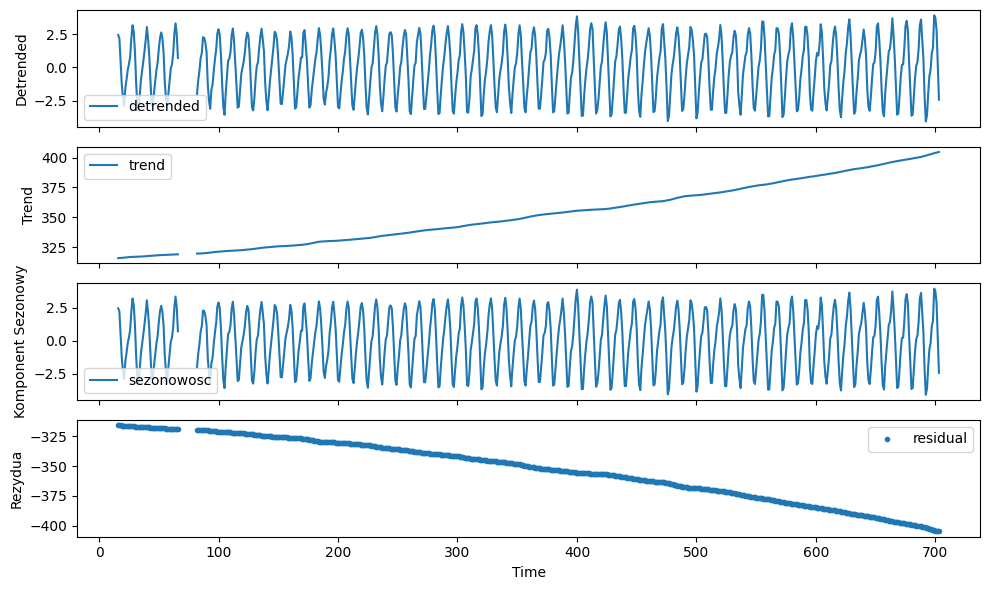

In [41]:
fig, ax = plt.subplots(nrows=4, figsize=[10, 6], sharex=True)

df_sorted["detrended"].plot(ax=ax[0], legend="detrended")
ax[0].set_ylabel("Detrended")

df_sorted["trend"].plot(ax=ax[1], legend="trend")
ax[1].set_ylabel("Trend")

df_sorted["sezonowosc"].plot(ax=ax[2], legend="sezonowsc")
ax[2].set_ylabel("Komponent Sezonowy")

df_sorted["residual"].plot(ax=ax[3], marker=".", legend="residual", ls="None")
ax[3].set_ylabel("Rezydua")

ax[3].set_xlabel("Time")

plt.tight_layout()